In [ ]:
"""Determining Structure from Microwave Spectroscopy"""

__authors__ = "D. Brandon Magers"
__credits__ = ["W. D. Allen"]
__email__   = ["bmagers@belhaven.edu"]

__copyright__ = "(c) 2008-2020, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2020-07-13"

# Determining Structure from Microwave Spectroscopy

### Introduction
Scientists can learn so much more by analyzing the direct physical obervables obtained in a laboratory setting.  Microwave spectroscopy is an instrumental technique that can determine the rotational constants of small molecules.  From these experimental rotational constants, the Kraitchman equations can be used to determine the molecular structure to high precision of a reference molecule and isotope substituted isotopologs.

$$z_i=\sqrt{\left ( \frac{\hbar}{4\pi} \right )
\left ( \frac{1}{\Delta m_i}+\frac{1}{M} \right )
\left ( \frac{A^{\circ}}{B^{\circ}} \right )
\left ( 1-\frac{B^{\circ}}{A_i} \right )
\left ( 1-\frac{B^{\circ}}{B_i} \right )
\left ( \frac{1}{B^{\circ}-A^{\circ}} \right ) }$$

$$y_i=\sqrt{\left ( \frac{\hbar}{4\pi} \right )
\left ( \frac{1}{\Delta m_i}+\frac{1}{M} \right )
\left ( \frac{B^{\circ}}{A^{\circ}} \right )
\left ( 1-\frac{A^{\circ}}{A_i} \right )
\left ( 1-\frac{A^{\circ}}{B_i} \right )
\left ( \frac{1}{A^{\circ}-B^{\circ}} \right ) }$$

Here $z_i$ and $y_i$ give the positive displacement of atom *i* from the center of mass in meters. The other
variables are defined as follows:

$\Delta m_i \Rightarrow $ difference of isotope mass from reference atom mass in *kg*

$M \Rightarrow $ total mass of reference molecule in *kg*

$A^{\circ} \Rightarrow $ rotational constant A of reference molecule in $m^{-1}$

$B^{\circ} \Rightarrow $ rotational constant B of reference molecule in $m^{-1}$

$A_i \Rightarrow $ rotational constant A of isotopolog in $m^{-1}$

$B_i \Rightarrow $ rotational constant B of isotopolog in $m^{-1}$

We will use these equations to determine the precise molecular structure of ethenone with <i>C</i><sub>2v</sub> symmetry pictured below.

<div>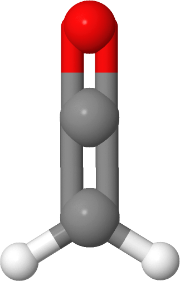</div>

Consider the molecule to be oriented in the *yz* plane with the *z* axis along the principle axis of rotation.  This automatically means the <i>x</i> coordinate for each atom is 0.  Assume the oxygen is displaced in the positive *z* direction.

The following table contains experimental high-resolution rotational constants in MHz for isotopologs for ethenone.

|  | A | B | C |
| :-: | :-: | :-: | :-: |
| H<sub>2</sub>CCO | 282101.185 | 10293.32117 | 9915.90548 |
| H<sup>2</sup>HCCO | 194305 | 9647.0664 | 9174.6457 |
| H<sub>2</sub><sup>13</sup>CCO | 282112 | 9960.9659 | 9607.1276 |
| H<sub>2</sub>CC<sup>18</sup>O | 287350 | 9761.2368 | 9421.1236 |

The mass of the atoms and their isotopes are needed.  The reference molecule (first row of the above table) contains the most abundant isotope of each atom type.  The isotope masses are listed here.  Source: [NIST](https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses)

|  | mass in *Daltons* |
| :-: | :-: |
| <sup>1</sup>H | 1.00782503223 |
| <sup>2</sup>H | 2.01410177812 |
| <sup>12</sup>C | 12. |
| <sup>13</sup>C | 13.00335483507 |
| <sup>16</sup>O | 15.99491461957 |
| <sup>18</sup>O | 17.99915961286 |


In [ ]:
# ==> Import Psi4 & NumPy <==
import psi4
import numpy as np

## Part 1 - Using the Kraitchman equations
Use the Kraitchman equations to find the displacement in the *z* and *y* directions of each atom except the central carbon (one connected to oxygen).  Modify the code below as needed.

In [ ]:
# Define all constants and values needed for Kraitchman equations and convert to SI units
h_bar = 1.054571817e-34 # Planck's constant in J*s
RotConst_MHz = np.array([[282101.185, 10293.32117, 9915.90548],
                         [194305,9647.0664, 9174.6457],
                         [282112,9960.9659, 9607.1276],
                         [287350, 9761.2368, 9421.1236]])

# Convert rotational constants to SI units
RotConst_Hz = 

# Define reference rotational constants for easier use
RotConst_A_ref = RotConst_Hz[0][0]
RotConst_B_ref = 

# Define mass constants
amu_to_kg = 
M_ref = np.array([1.00782503223,12.,15.99491461957])
M_iso = np.array([2.01410177812,13.00335483507,17.99915961286])

# Determine total mass of reference molecule in kg
M_total_ref =

# Determine mass difference from isotopolog and reference molecule
M_delta = (M_iso - M_ref) * amu_to_kg

In [ ]:
# Define functions for Kraitchman equation
# Each k is one of the 6 terms multiplied together within the square root in the equation provided above
def kraitchman_z(M_delta, RotConst_A, RotConst_B):
    k1 = 
    k2 = 
    k3 = 
    k4 = 
    k5 = 
    k6 = 
    z = np.sqrt(k1 * k2 * k3 * k4 * k5 * k6)
    z *=  # convert from m to Angstroms
    return z

def kraitchman_y(M_delta, RotConst_A, RotConst_B):
    k1 = 
    k2 = 
    k3 = 
    k4 = 
    k5 = 
    k6 = 
    y = np.sqrt(k1 * k2 * k3 * k4 * k5 * k6 + 0j).real # to avoid errors when computing value that should be exactly 0
    y *=  # convert from m to Angstroms
    return y

In [ ]:
# Use defined functions to solve Kraitchman equations and print results
# Since the Kraitchman equations only return positive displacements we have to manually assign +/- signs
zcoord_H = kraitchman_z(M_delta[0], RotConst_Hz[1][0], RotConst_Hz[1][1])
ycoord_H = 
zcoord_C = 
ycoord_C = 
zcoord_O = 
ycoord_O = 

# Build xyz coordinates and replace y & z zeros as needed
xyz_coords = np.array([[0.0, ycoord_H, 0.0],
                      [0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0], # temporarily set as zero
                      [0.0, 0.0, 0.0]])
print("Incomplete xyz coordinates in Angstroms")
print(xyz_coords)

---
## Part 2 - Use center of mass to find xyz of final carbon atom
Now that the xyz coordinates have been found for four of the five atoms, that information can be used to find the coordinates of the final carbon atom.  The Kraitchman equations assume that the origin is located at the center of mass.  So the center of mass equation can be used to find the missing information.

$$y=0=\frac{\sum_{i=1}^{N}m_i y_i}{total mass} $$

$$z=0=\frac{\sum_{i=1}^{N}m_i z_i}{total mass} $$


In [ ]:
# Rearrange and solve center of mass equation for coordinates of final central carbon atom
# Remember to manually assign +/- signs

zcoord_C2 = 

xyz_coords[3,2] = zcoord_C2
print("Final xyz coordinates in Angstroms\n")
print(xyz_coords)

---
## Part 3 - Bond lengths and bond angles
Compute all bond lengths and the H-C-H bond angle.

In [ ]:
# bond lengths
rCO = 
rCC = 
rCH = 
# H-C-H bond angle
aHCH = 

# Print results
print(f"rCO = {rCO:.4f} Å")
print()
print()
print()

---
## Part 4 - Calculate Rotational Constants with Psi4
Use Psi4 to determine the rotational constants from your determined xyz geometry.

In [ ]:
# Define molecule geometry in angstroms
# Example: "H 0.0 1.23 4.56" for each atom

mol = psi4.geometry("""
H   
H  
C  
C  
O  
""")

# Set each atoms isotope mass
mol.set_mass(0,1.00782503223)
mol.set_mass()
mol.set_mass()
mol.set_mass()
mol.set_mass()

# Find rotational constants
rot_conts_wn = psi4.core.Molecule.rotational_constants(mol).to_array() # in cm^-1
print(rot_conts_wn," in cm^-1")

# convert to MHz
c =  # speed of light in m/s
rot_conts_MHz = 
print(rot_conts_MHz," in MHz")

---
## Part 5 - Analyze
Answer the following.

1. Compare the results from Psi4 to the provided experimental literature values.
2. Why does the geometry/structure of a molecule and the rotational constants have a relationship?  Think about how a rotational constant is defined.

In [ ]:
# Write your answers below

